In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset 

In [2]:
data_movie = pd.read_csv(r'C:\Users\Nikhil\Desktop\Python folder\IMDb Movies India.csv', encoding='ISO-8859-1')
data_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Data preproccessing 

In [3]:
def dataoverview(data_movie, message):
    print(f'{message}:\n')
    print("Rows:", data_movie.shape[0])
    print("\n Number of features:", data_movie.shape[1])
    print("\n Features:")
    print(data_movie.columns.tolist())
    print("\n Missing values:", data_movie.isnull().sum().values.sum())
    print("\n Unique values:")
    print(data_movie.nunique())

In [4]:
dataoverview(data_movie, 'Overview of training dataset')

Overview of training dataset:

Rows: 15509

 Number of features: 10

 Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

 Missing values: 33523

 Unique values:
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


In [5]:
data_movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data_movie['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [8]:
data_movie['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [9]:
data_movie['Actor 1'].value_counts()

Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: count, Length: 4718, dtype: int64

In [10]:
data_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
data_movie.dropna(subset = ['Name', 'Year', 'Duration', 'Votes', 'Rating'], inplace = True)
data_movie.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [12]:
data_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
dataoverview(data_movie,'Overview of the training dataset')

Overview of the training dataset:

Rows: 5851

 Number of features: 10

 Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

 Missing values: 387

 Unique values:
Name        5570
Year          91
Duration     178
Genre        393
Rating        83
Votes       2030
Director    2549
Actor 1     2046
Actor 2     2373
Actor 3     2572
dtype: int64


## Removing the paranthesis from 'Year' column, commas from 'Votes' column and min from 'duration' column and converting these into integers 

In [14]:
data_movie['Year'] = data_movie['Year'].str.strip('()').astype(int)

In [15]:
data_movie['Votes'] = data_movie['Votes'].str.replace(',','').astype(int)

In [16]:
data_movie['Duration'] =  data_movie['Duration'].str.replace('min','').astype(int)

In [17]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.3+ KB


In [18]:
data_movie.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [19]:
data_movie.drop('Genre', axis=1,inplace = True)

In [20]:
data_movie.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Exploratory Data Analysis

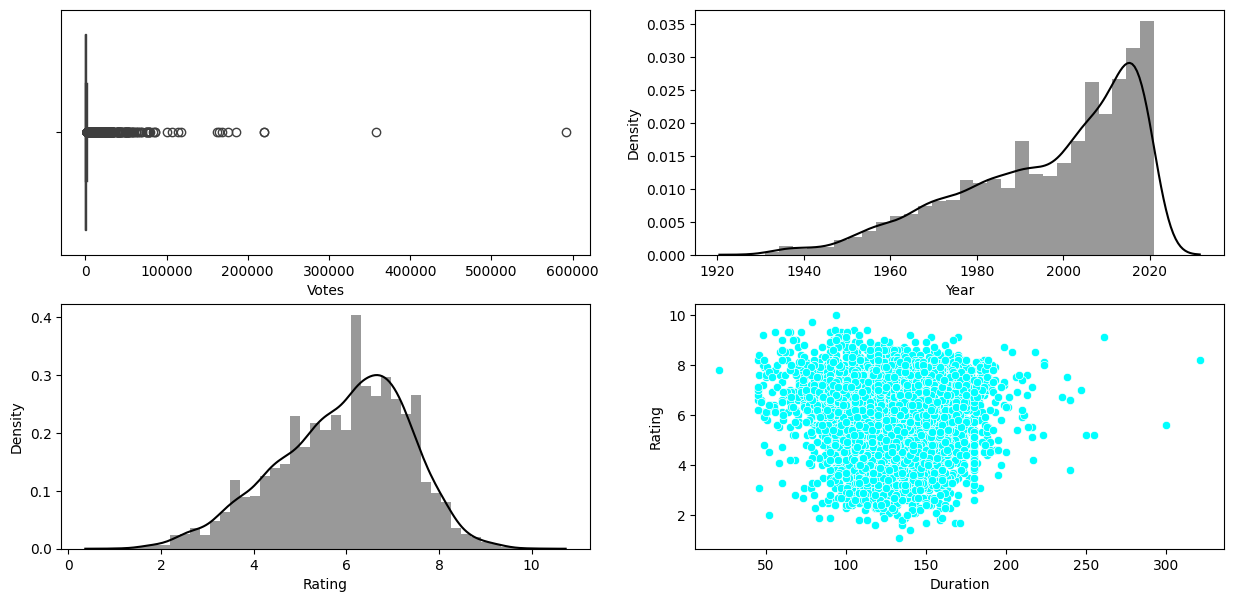

In [32]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(x = 'Votes', data = data_movie)

plt.subplot(2,2,2)
sns.distplot(data_movie['Year'], color='black')

plt.subplot(2,2,3)
sns.distplot(data_movie['Rating'], color='black')

plt.subplot(2,2,4)
sns.scatterplot(x=data_movie['Duration'], y=data_movie['Rating'], data = data_movie, color='aqua')

plt.show()

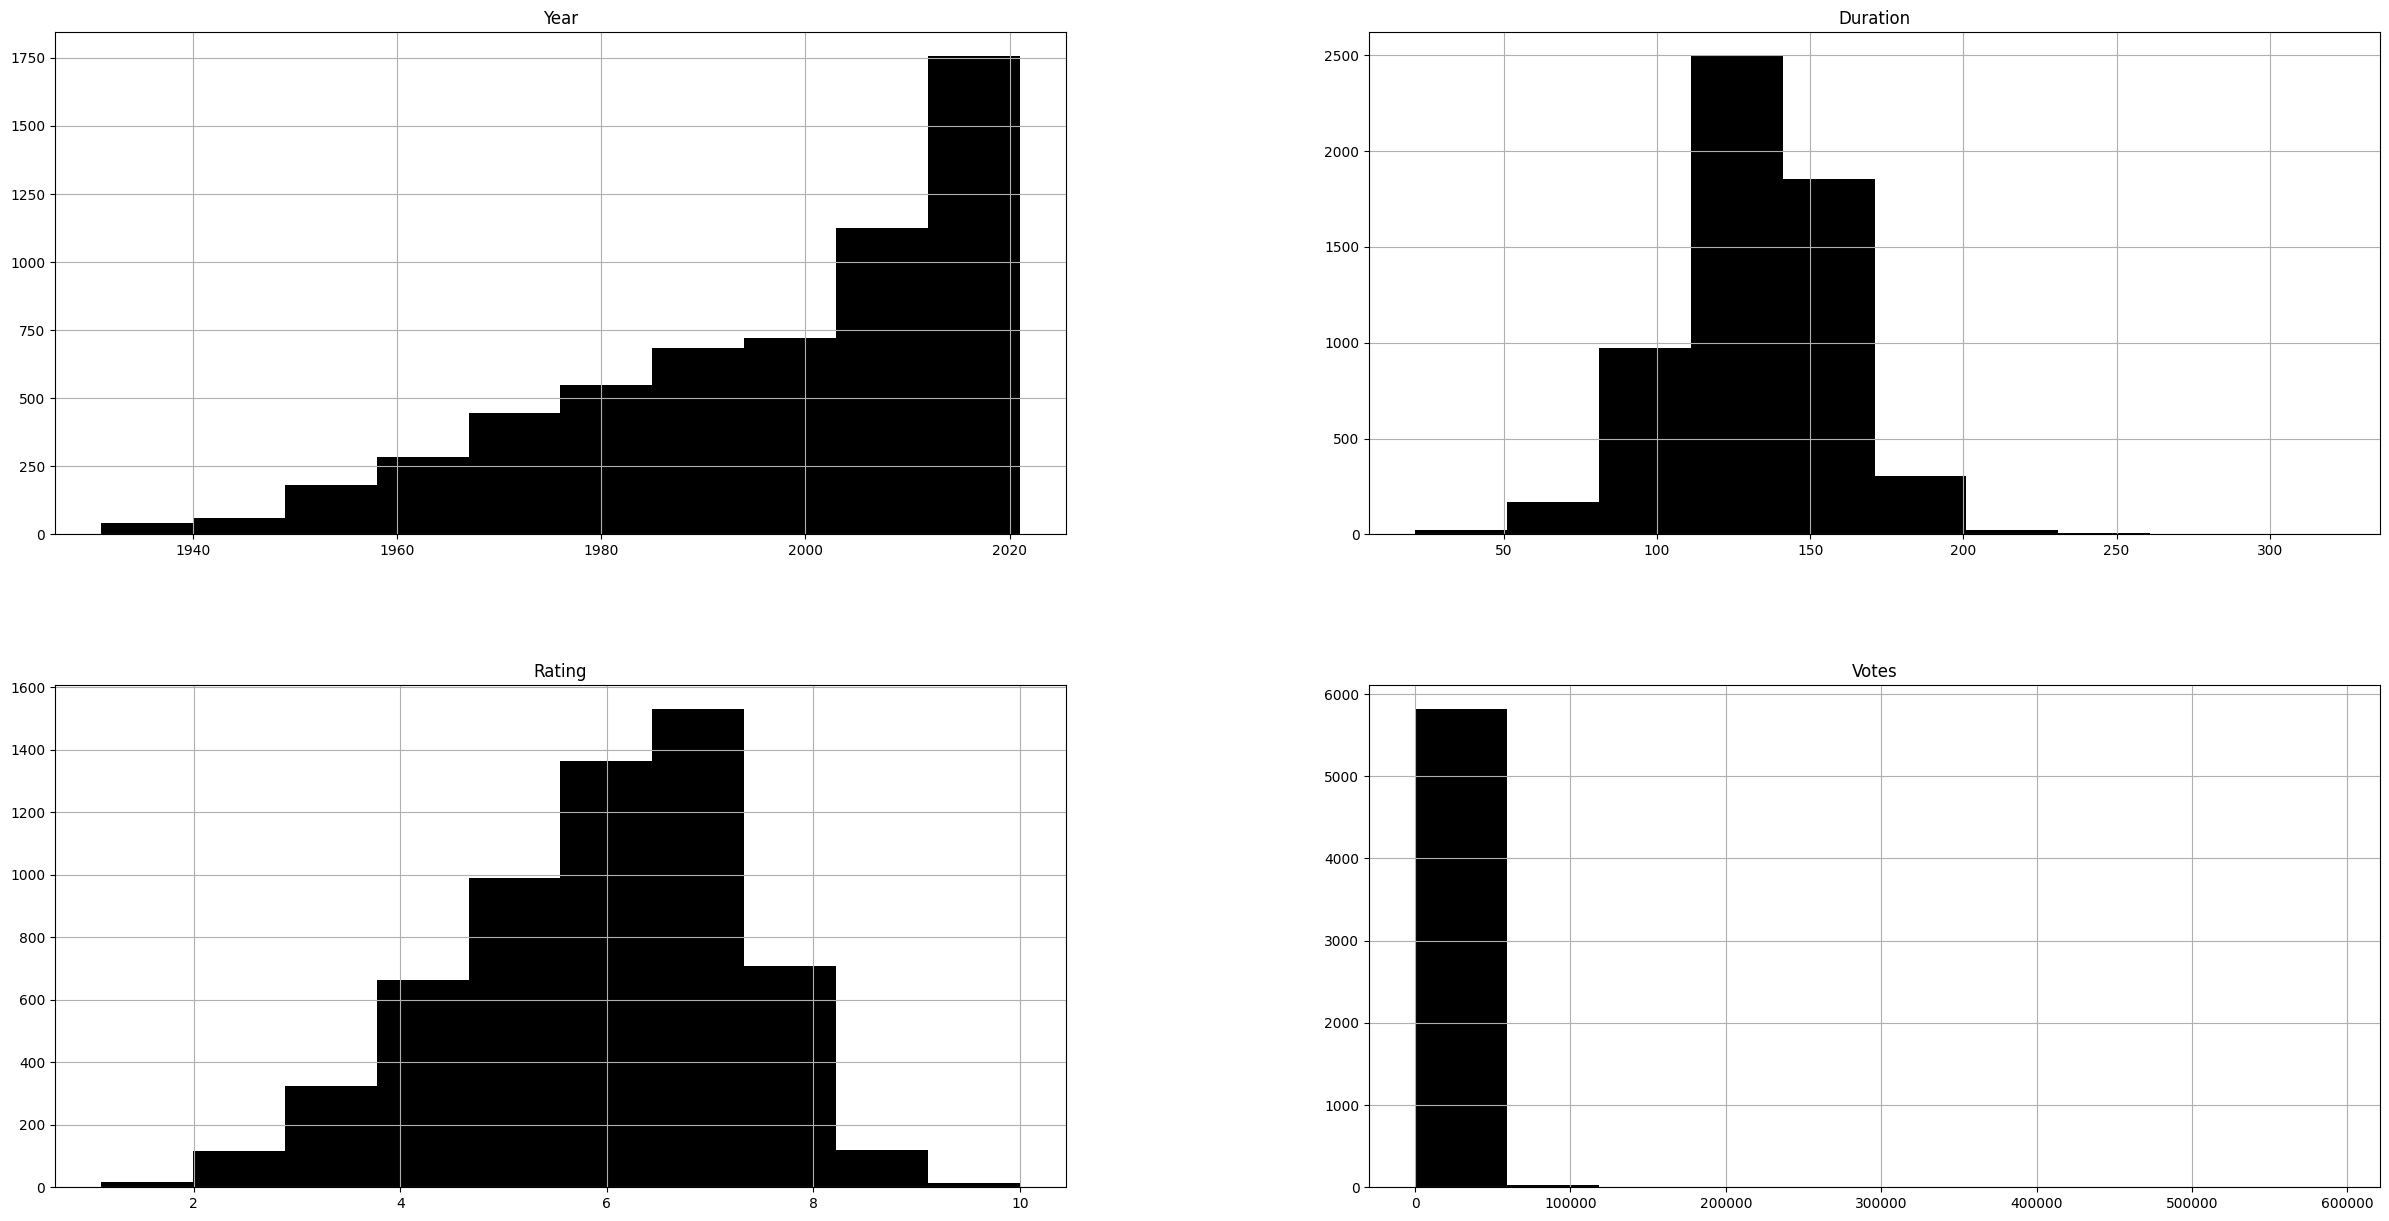

In [34]:
data_movie.hist(figsize=(30, 15),color= 'black')
None

In [36]:
data_movie.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [37]:
data_movie.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1, inplace=True)
data_movie.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


In [38]:
x = data_movie[['Year','Duration','Votes']]
y = data_movie['Rating']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1000)

## Model building

In [48]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter = 10000, random_state=1000))
])

In [49]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

## predict ratings on the test set

In [50]:
y_pred_pipeline = pipeline.predict(x_test)

## model Evaluation

In [52]:
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
r2_pipeline = r2_score(y_test, y_pred_pipeline)

In [53]:
print("Pipeline for Mean Absolute Error:", mae_pipeline)
print("Pineline for Mean Suared Error:", mse_pipeline)
print("R-Squared_pipeline:", r2_pipeline)

Pipeline for Mean Absolute Error: 1.0570345941304107
Pineline for Mean Suared Error: 1.797217669044555
R-Squared_pipeline: 0.049725124947985644


## Model Deployment

In [54]:
new_input = pd.DataFrame({
    'Year': [2022],
    'Duration':[110],
    'Votes':[10000],
})

predicted_rating = pipeline.predict(new_input)
print("Predicted Ratings:", predicted_rating)

Predicted Ratings: [5.83121301]
